<a href="https://colab.research.google.com/github/WittmannF/fastai/blob/docs-portuguese/docs_src/pt-br/tutorial.data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olhando os dados
> **Resumo:** Tutorial iniciante que explica como rapidamente dar uma olhada nos seus dados ou nas predições do modelo



## Visualizando entradas e saídas

In [0]:
from fastai.basics import *
from fastai.gen_doc.nbdoc import *

Neste tutorial, vamos ver como a mesma API permite que você obtenha olhar as entradas e saídas do seu modelo, seja na aplicação de visão, texto ou tabular. Nós vamos passar por várias tarefas diferentes e para cada uma delas vamos agregar alguns dados em um [`DataBunch`](/basic_data.html#DataBunch) com o [data block API](/data_block.html), ver como visualizar algumas entradas com o método `show_batch`, treinar um [`Learner`](/basic_train.html#Learner) apropriado, em seguida, usar método ` show_results` como são as saidas do modelo. 

In [0]:
jekyll_note("""As usual, this page is generated from a notebook that you can find in the docs_src folder of the
<a href="https://github.com/fastai/fastai">fastai repo</a>. The examples are all designed to run fast, which is why we use
samples of the dataset, a resnet18 as a backbone and don't train for very long. You can change all of those parameters
to run your own experiments!
""")

<div markdown="span" class="alert alert-info" role="alert"><i class="fa fa-info-circle"></i> <b>Note: </b>As usual, this page is generated from a notebook that you can find in the docs_src folder of the
<a href="https://github.com/fastai/fastai">fastai repo</a>. The examples are all designed to run fast, which is why we use
samples of the dataset, a resnet18 as a backbone and don't train for very long. You can change all of those parameters
to run your own experiments!
</div>

## Visão

Para obter acesso rápido a todas as funções de visão do fastai, usamos a seguinte expressão:

In [0]:
from fastai.vision import *

### Problema de classificação

Vamos começar importando uma amostragem do conjunto de dados MNIST.

In [0]:
mnist = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)

O mesmo está configurado com uma estrutura igual à base de imagens Imagenet, desta forma não precisamos importar os conjuntos de dados de treinamento e validação. Em seguida, vamos definir a origem do rótulo, aplicar transformações, convertê-lo em um ImageDataBunch e, por fim, normalizá-los:

In [0]:
data = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats)) #obs: os parênteses externos sao utilizados para e a expressão possa ter múltiplas linhas

Uma vez que seus dados estão devidamente configurado em um [`DataBunch`](/basic_data.html#DataBunch), podemos chamar o método `data.show_batch()` para ver dar uma olhada em um batch de dados (subconjunto alimentado à rede neural para cada iteração dos pesos). 

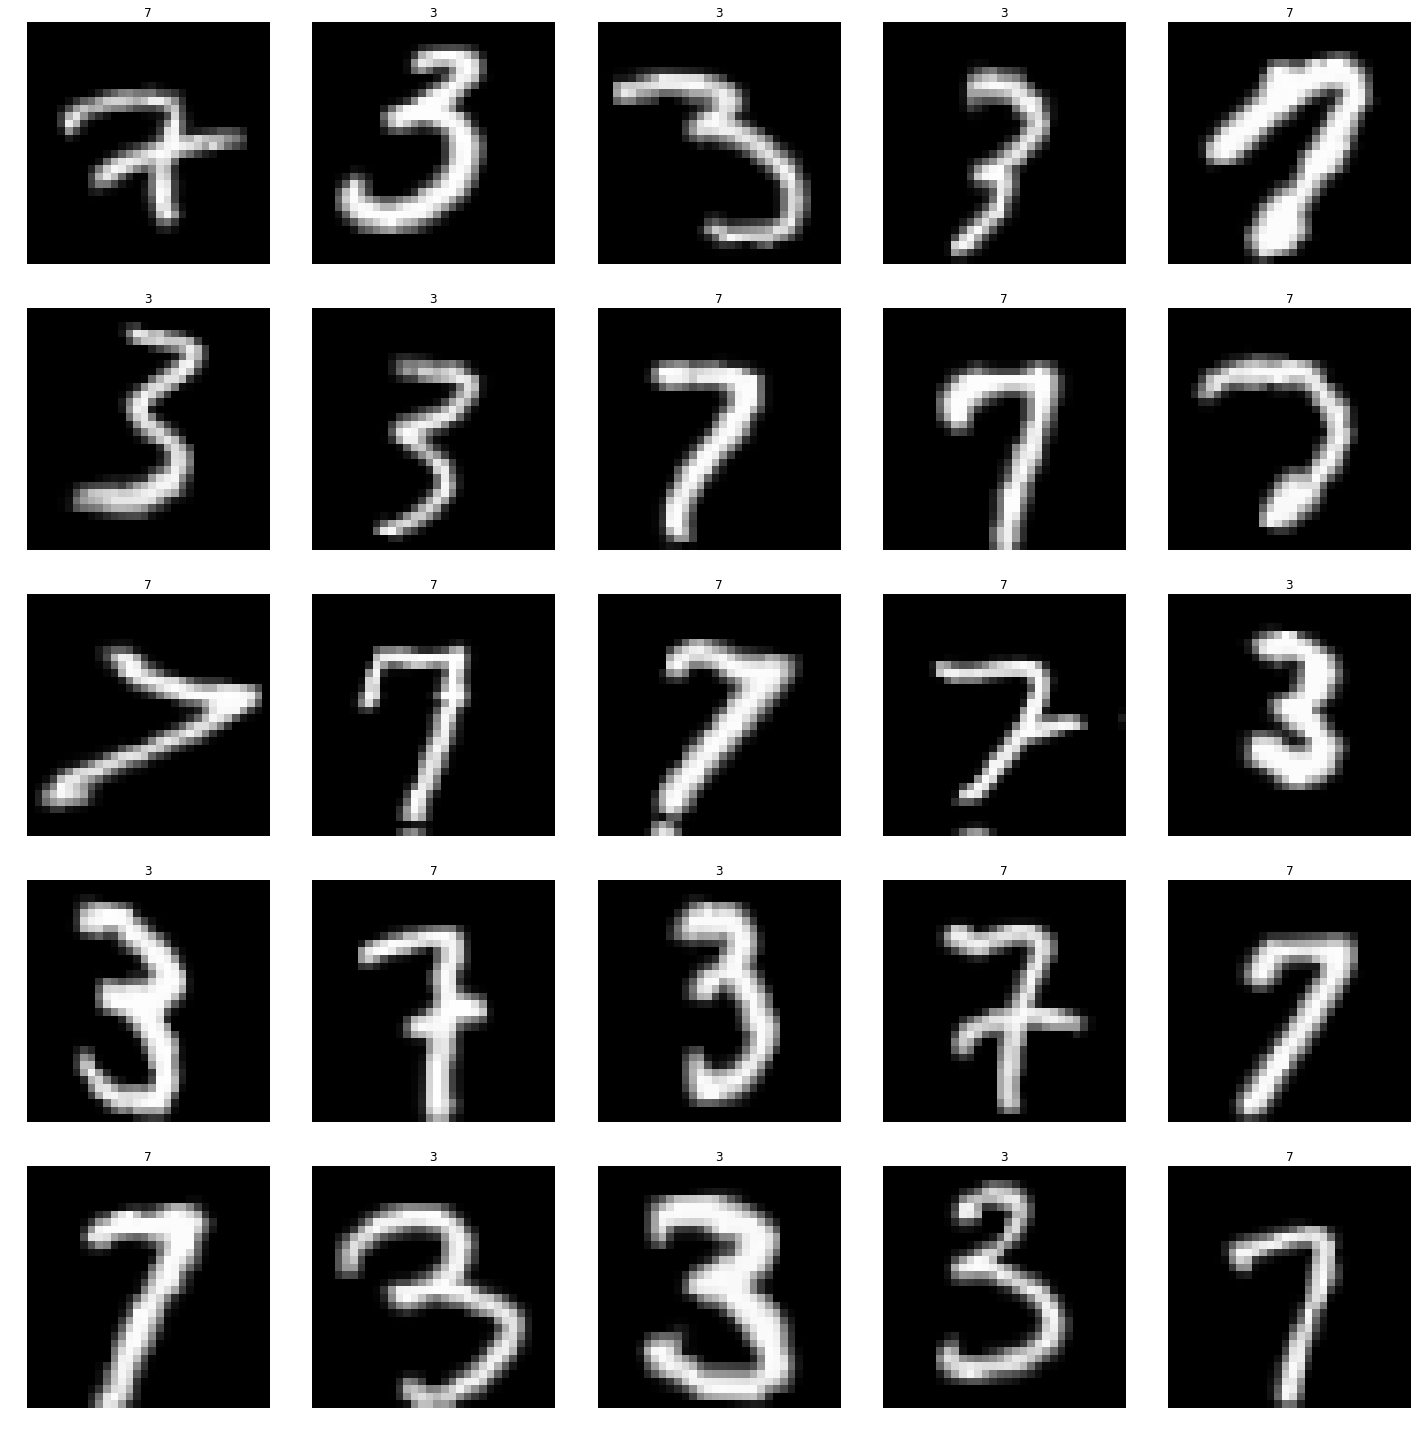

In [5]:
data.show_batch()

Note-se que as imagens foram automaticamente "desnormalizadas" antes de serem mostradas com seus rótulos (inferidas a partir dos nomes das pastas). Nós podemos especificar um número de linhas (`rows`) caso o padrão 5 seja muito grande, e nós podemos também limitar o tamanho da figura.

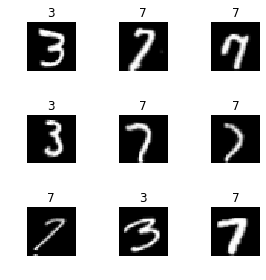

In [6]:
data.show_batch(rows=3, figsize=(4,4))

Vamos em seguida criar um objeto da classe [`Learner`](/basic_train.html#Learner) para treinar um classificador.

In [7]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1,1e-2)
learn.save('mini_train')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 104MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,0.606093,0.870972,0.772532,00:03


Nosso modelo rapidamente atingiu uma precisão de aproximadamente 89%. Vamos agora ver suas previsões sobre uma amostra do conjunto de validação. Para isso, usamos o método `show_results`.

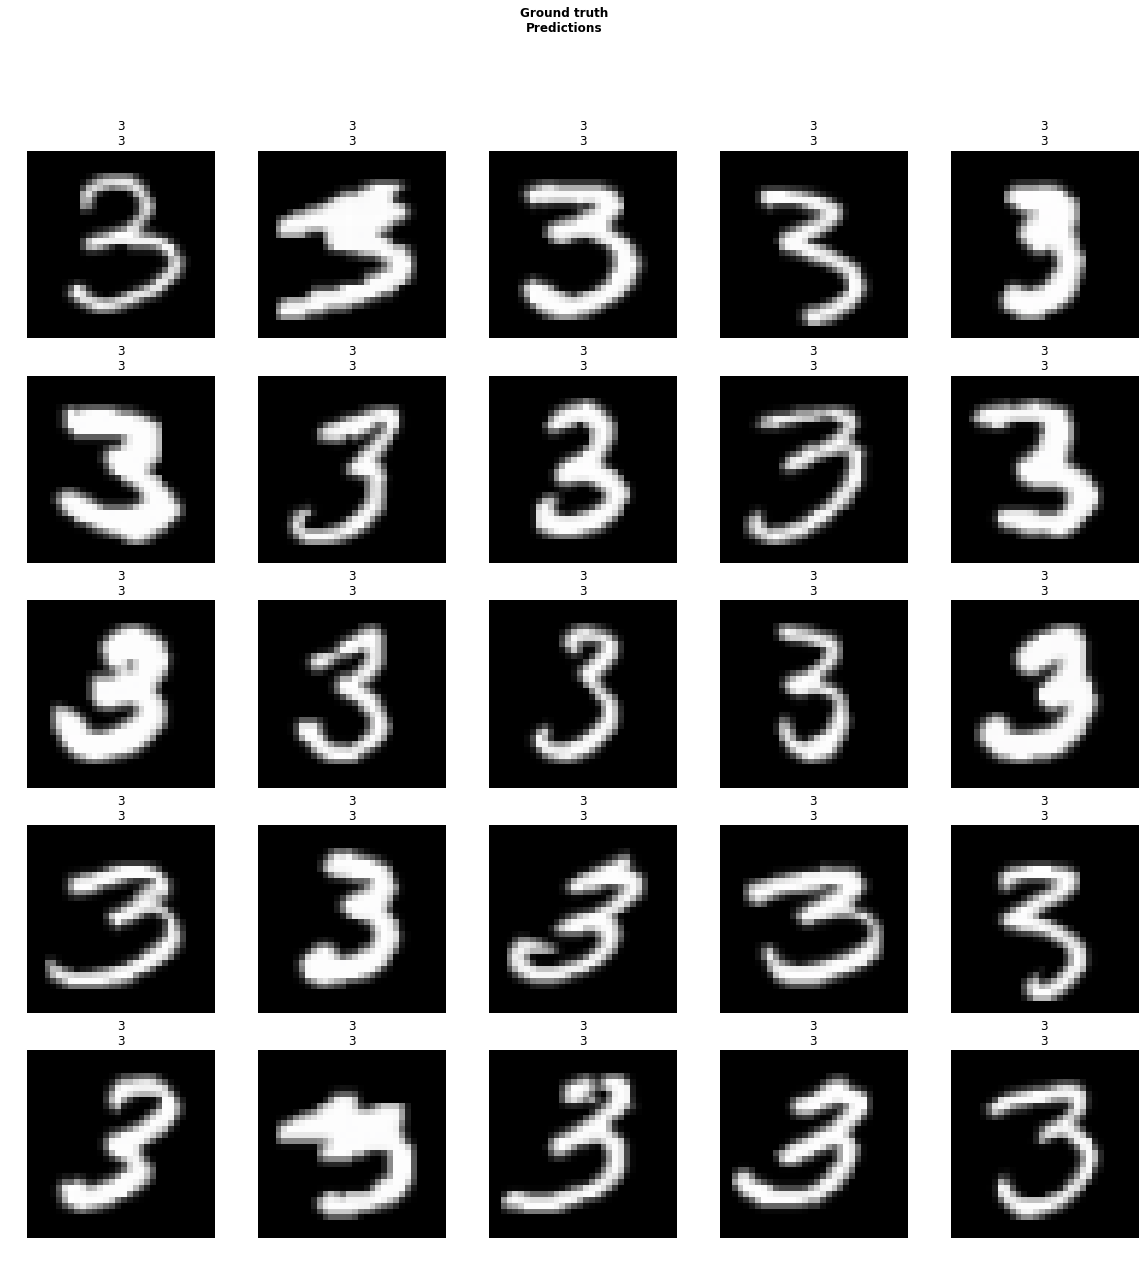

In [8]:
learn.show_results()

Uma vez que o conjunto de validação é geralmente ordenado, temos apenas imagens pertencentes à mesma classe. Assim como antes, podemos aqui também especificar um número de linhas, um tamanho figura e além disso também o conjunto de dados em que queremos fazer as inferências.

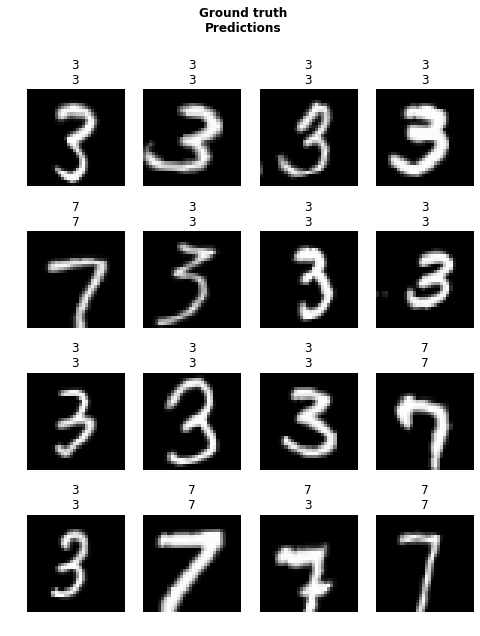

In [9]:
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(8,10))

A variável `ds_type=DatasetType.Train` serve para definir que o tipo de dados que vamos inferir predições é a de treinamento. Por padrão a inferência já está definida para o conjunto de validação (que seria `ds_type=DatasetType.Valid` se fôssemos definir manualmente)

### Problema multi-rótulo

Agora vamos testar treinar um modelo com o conjunto de dados Planet, que é um pouco diferente no sentido de que cada imagem pode ter vários rótulos (em vez de apenas um).

In [0]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

Aqui, todas as imagens estão rotuladas em um arquivo chamado `labels.csv`.

In [73]:
!head {planet.as_posix()+'/labels.csv'}

image_name,tags
train_31112,clear primary
train_4300,partly_cloudy primary water
train_39539,clear primary water
train_12498,agriculture clear primary road
train_9320,clear primary
train_28430,agriculture clear cultivation primary road
train_4788,cloudy
train_95,clear primary
train_28156,artisinal_mine clear primary road water


Para cada nome de arquivo, precisamos acrescentar o prefixo 'train' (definido abaixo em `folder`) e o sufixo '.jpg'. Além disso, os rótulos são separados por espaços.

In [0]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        .split_by_rand_pct() # Divisão treino/validação (valor padrão de 20%)
        .label_from_df(label_delim=' ') # Separação dos rótulos por espaço
        .transform(planet_tfms, size=128) # Aplicar transformações
        .databunch() # Converter em um DataBunch
        .normalize(imagenet_stats)) # Normalizar com estatísticas do imagenet

In [75]:
data

ImageDataBunch;

Train: LabelList (160 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
partly_cloudy;primary;water,clear;primary;water,clear;primary,agriculture;clear;cultivation;primary;road,cloudy
Path: /root/.fastai/data/planet_tiny;

Valid: LabelList (40 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,agriculture;clear;cultivation;primary;road,partly_cloudy;primary,clear;primary,clear;primary
Path: /root/.fastai/data/planet_tiny;

Test: None

Podemos dar uma olhada nos dados com `data.show_batch`.

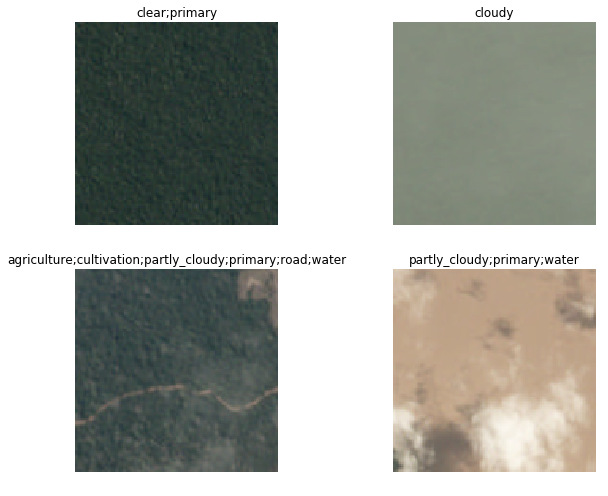

In [76]:
data.show_batch(rows=2, figsize=(9,7))

Em seguida, podemos facilmente criar um objeto [`Learner`](/basic_train.html#Learner) e treina-lo um pouco:

In [77]:
learn = cnn_learner(data, models.resnet18)
learn.fit_one_cycle(5,1e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss,time
0,1.000727,1.033077,00:00
1,0.959433,1.052532,00:00
2,0.907282,0.913530,00:00
3,0.855725,0.758261,00:00
4,0.807428,0.686850,00:00


Para ver previsões reais, basta executar `learn.show_results()`.

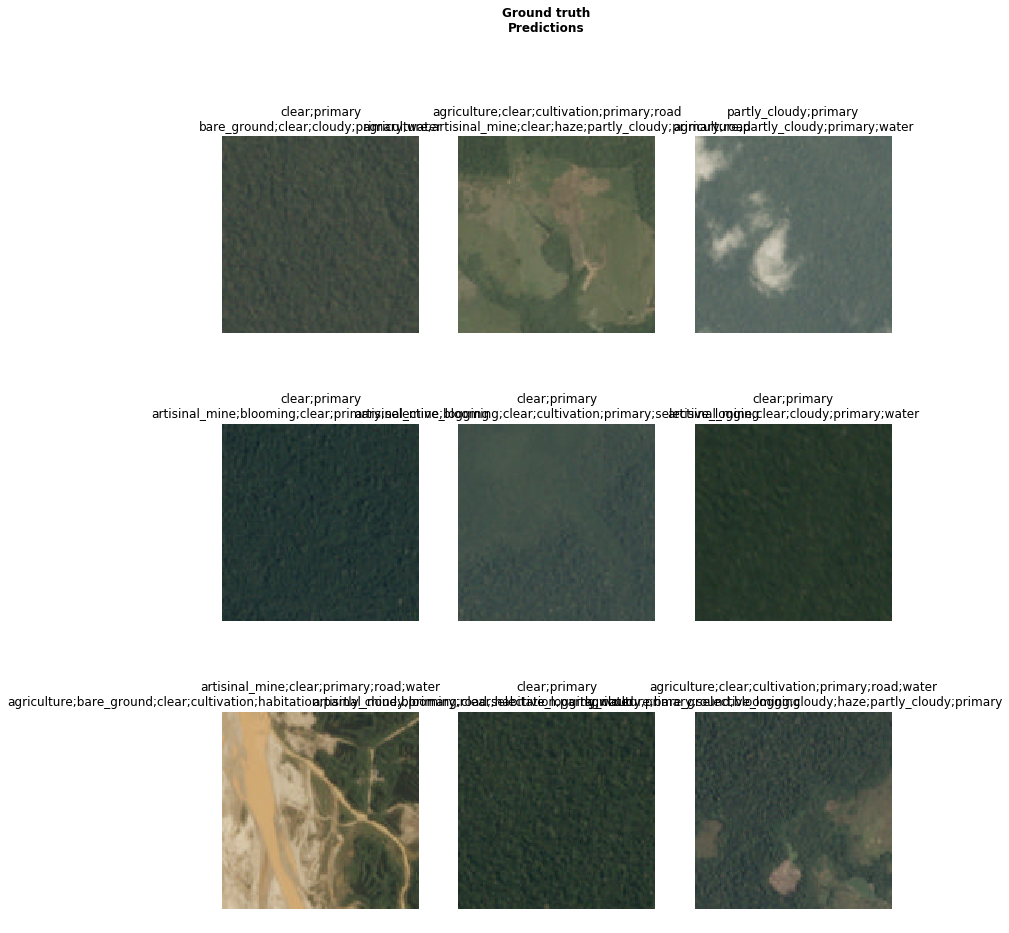

In [78]:
learn.show_results(rows=3, figsize=(12,15))

### Um exemplo de regressão

Para o próximo exemplo, vamos usar o dataset [BIWI head pose](https://data.vision.ee.ethz.ch/cvl/gfanelli/head_pose/head_forest.html#db). O dataset contém imagens de pessoas e o objetivo é encontrar o centro de cada. Para a documentação da fastai, nós criamos uma pequena subamostra do conjunto de dados (200 imagens) e preparamos um dicionário com a cordenada de cada nome de arquivo com o centro de cada rosto.

In [0]:
biwi = untar_data(URLs.BIWI_SAMPLE)
fn2ctr = pickle.load(open(biwi/'centers.pkl', 'rb'))

In [94]:
fn2ctr['0.jpg']

tensor([84.0480, 84.8110])

Para pegar os dados, usamos o dicionário importado anteriormente para rotular os itens. Também usamos a classe [`PointsItemList`](/vision.data.html#PointsItemList) para que as variáveis alvo sejam do tipo [`ImagePoints`](/vision.image.html#ImagePoints) (desta forma a augmentação dos dados será aplicada apropriadamente). Ao chamar [`transform`](/tabular.transform.html#tabular.transform) certifique-se de definir `tfm_y = true`.

In [0]:
data = (PointsItemList.from_folder(biwi)
        .split_by_rand_pct(seed=42)
        .label_from_func(lambda o:fn2ctr[o.name])
        .transform(get_transforms(), tfm_y=True, size=(120,160))
        .databunch()
        .normalize(imagenet_stats))

Em seguida, podemos dar uma olhada nos dados usando `data.show_batch()`.

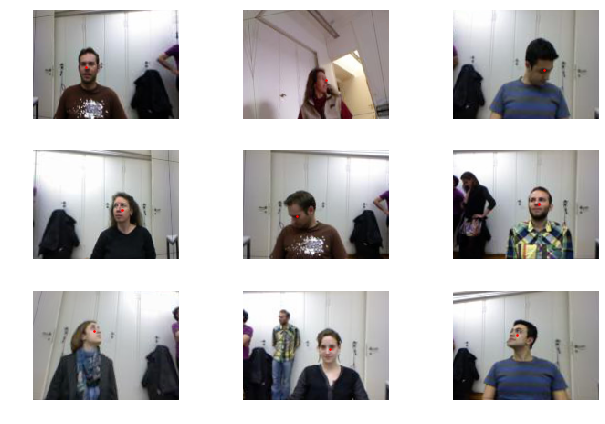

In [96]:
data.show_batch(rows=3, figsize=(9,6))

Vamos treinar um pouco o modelo em seguida mostrar os resultados com `learn.show_results()`.

In [97]:
learn = cnn_learner(data, models.resnet18, lin_ftrs=[100], ps=0.05)
learn.fit_one_cycle(5, 5e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss,time
0,1.774812,17.950394,00:03
1,3.600239,107.734085,00:01
2,3.105739,28.536697,00:01
3,2.414805,5.979707,00:01
4,1.967422,2.340413,00:01


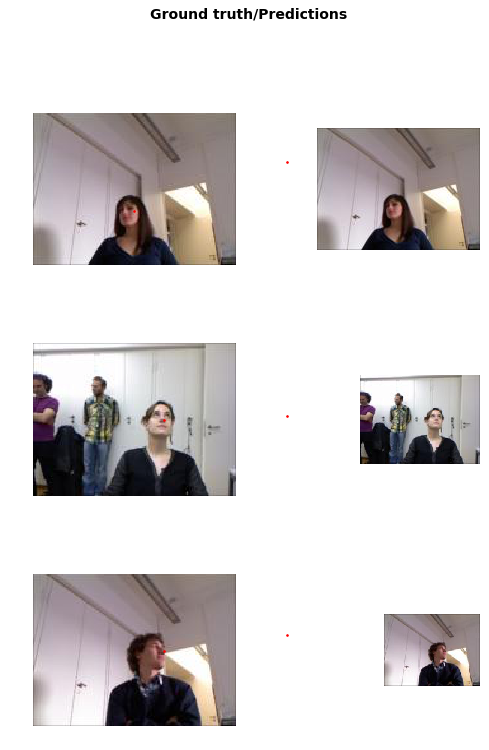

In [98]:
learn.show_results(rows=3)

### Um exemplo de segmentação

Vamos agora dar uma olhada em uma pequena amostra da base de dados [camvid](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/), no qual precisamos prever a classe de cada pixel de uma imagem. Cada imagem na subpasta 'images' contém uma imagem equivalente em 'labels' na forma de uma máscara segmentada.

In [0]:
camvid = untar_data(URLs.CAMVID_TINY)
path_lbl = camvid/'labels'
path_img = camvid/'images'

Lemos as classes em 'codes.txt' e definimos uma função para mapear cada nome de arquivo de imagem com seu nome de arquivo máscara correspondente.

In [0]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str)
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

Em seguida convertemos tudo para um [`DataBunch`](/basic_data.html#DataBunch) e damos uma olhada nos dados com `show_batch()`.

In [0]:
data = (SegmentationItemList.from_folder(path_img)
        .split_by_rand_pct()
        .label_from_func(get_y_fn, classes=codes)
        .transform(get_transforms(), tfm_y=True, size=128)
        .databunch(bs=16, path=camvid)
        .normalize(imagenet_stats))

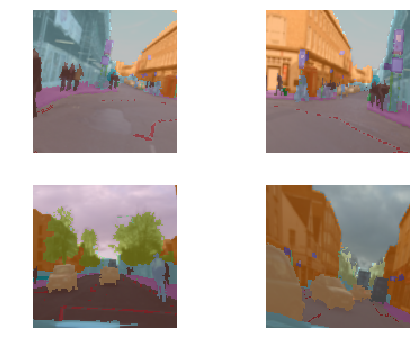

In [103]:
data.show_batch(rows=2, figsize=(7,5))

Em seguida, treinamos um Unet por algumas épocas.

In [104]:
jekyll_warn("Este treinamento é bastante instável, teste utilizar mais épocas e a base de dados completa para obter resultados melhores.")

<div markdown="span" class="alert alert-danger" role="alert"><i class="fa fa-danger-circle"></i> <b>Warning: </b>Este treinamento é bastante instável, teste utilizar mais épocas e a base de dados completa para obter resultados melhores.</div>

In [105]:
learn = unet_learner(data, models.resnet18)
learn.fit_one_cycle(3,1e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss,time
0,6.366218,2.593909,00:16
1,4.376709,2.418974,00:02
2,3.503770,1.945321,00:02


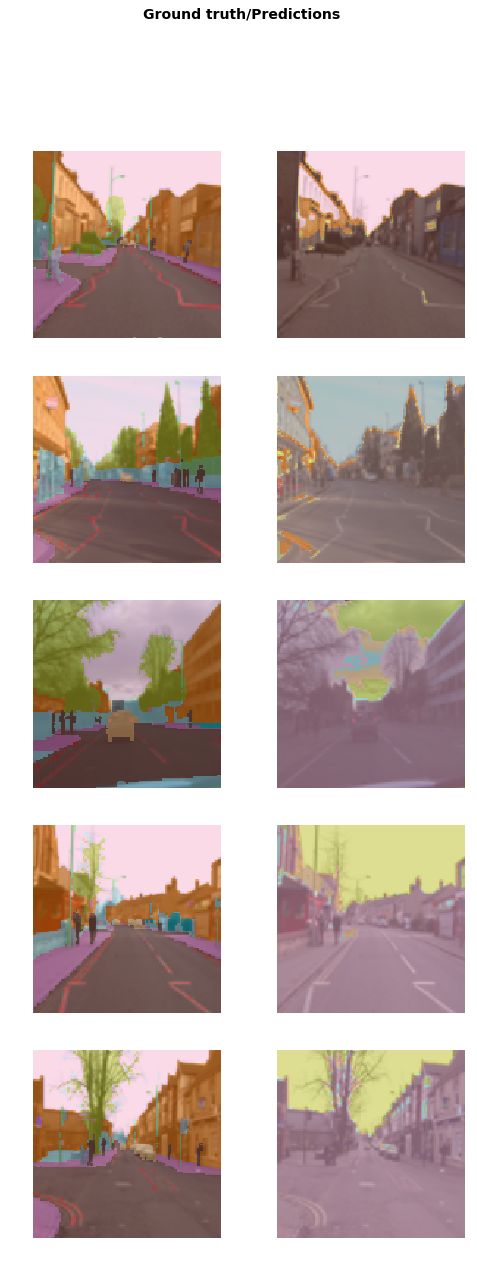

In [106]:
learn.show_results()

## Texto

Próxima aplicação é texto, então vamos começar importando tudo o que você precisa.

In [0]:
from fastai.text import *

### Modeling Language

Primeiro vamos afinar um modelo de linguagem pré-treinado em nosso subconjunto de title.

In [0]:
imdb = untar_data(URLs.IMDB_SAMPLE)

In [0]:
data_lm = (TextList.from_csv(imdb, 'texts.csv', cols='text')
                   .split_by_rand_pct()
                   .label_for_lm()
                   .databunch())
data_lm.save()

`Data.show_batch ()` irá funcionar aqui também. Para um modelo de linguagem, que nos mostra o início de cada seqüência de texto ao longo da dimensão de lote (o alvo sendo que adivinhar a próxima palavra).

In [0]:
data_lm.show_batch()

idx,text
0,"! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk ! xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is"
1,"that happened to me with "" xxmaj the xxmaj young xxmaj xxunk "" . xxmaj the cover of the video box , if you can find the video , is extremely xxunk . i 'd xxunk that the two women on the cover are n't even in the film . \n \n xxmaj anyway , i was either born a decade too late to appreciate the xxunk points of"
2,"about "" xxmaj xxunk "" . xxmaj on the plus side , the visuals are xxunk and the movie looks great for it 's type . xxmaj for those who like their horror movies gory there are a few nicely executed ( no pun intended ) murder scenes . xxmaj we also get a few good suspense sequences / set - pieces . \n \n xxmaj however , there"
3,"and xxmaj she xxmaj kills in xxmaj xxunk , but unfortunately his good films are just xxunk amongst xxunk of crap and xxmaj devil xxmaj hunter is very much a part of the crap . i saw this film purely because i want to be able to say i 've seen everything on the xxup dpp 's list ( just two more to go ! ) , and i 'm"
4,"the movie was more important than the planning . xxmaj because you have a camera does not mean you should make a movie right away ... come . xxmaj everyone can make a movie , but not all will be just as good . xxmaj so a word of advice to xxmaj xxunk xxmaj west are : stop and xxunk what you want . xxmaj use your time to start"


Agora vamos definir um modelo de linguagem do aluno

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM)
learn.fit_one_cycle(2, 1e-2)
learn.save('mini_train_lm')
learn.save_encoder('mini_train_encoder')

epoch,train_loss,valid_loss,accuracy
1,4.643319,3.866198,0.289663
2,4.367103,3.814913,0.292600


Então, podemos ter um olhar para os resultados. Ela mostra uma certa quantidade de palavras (por defeito 20), então o próximo 20 palavras alvo e as que foram preditos.

In [0]:
learn.show_results()

text,target,pred
xxbos xxmaj start of with the good bit : several times xxmaj xxunk talks xxmaj xxunk to his friends or,"language is heard among the xxunk . xxmaj that 's a great plus , as normally xxup usa & xxup","of . a . the xxunk . xxmaj the 's why xxunk film . but the , xxunk xxmaj xxup"
"fact , the characters are never really developed at all . xxmaj the xxunk are xxunk , xxunk xxunk ,","the women merely xxunk beautiful . xxmaj if you go by this movie , you would think that "" air","xxunk xxunk are xxunk the xxunk xxmaj the you 're to the , , you 'll n't that the xxmaj"
as well ) . xxmaj peter xxunk plays the dying killer daddy and watch for funny man xxmaj xxunk xxmaj,who made me laugh more than anything in the entire film in his brief five xxunk feet ) . xxmaj,. is a laugh . than anyone else the movie film . the xxunk xxunk - . . . xxmaj
a chance . xxmaj she xxunk deserved her xxmaj oscar . \n \n xxmaj this movie is in an,"in the most xxunk xxunk . xxmaj all parts xxunk , necessary and perfect . xxmaj xxunk may walk away","xxunk xxunk of of xxmaj it the of . the , interesting . xxmaj the xxmaj be away from you"
"xxunk ? ) , terrible cinematography , forgettable dialog , nothing funny or humorous , save the fact you just","your life for two hours , soundtrack ? , amateurish performances , uneven , disjointed , and often flat out","a time . the hours . and , xxmaj and xxunk , and acting xxunk acting and xxunk boring ,"


### Classificação

Agora vamos ver um exemplo de classificação. Temos que usar o mesmo vocabulário como para o modelo de linguagem, se quisermos ser capaz de usar o codificador que salva.

In [0]:
data_clas = (TextList.from_csv(imdb, 'texts.csv', cols='text', vocab=data_lm.vocab)
                   .split_from_df(col='is_valid')
                   .label_from_df(cols='label')
                   .databunch(bs=42))

Aqui show_batch mostra o início de cada revisão com o seu alvo.

In [0]:
data_clas.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and xxunk , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and xxunk xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj xxunk ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj xxunk to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the xxunk - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj xxunk",positive
"xxbos xxmaj many xxunk that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",positive


E nós podemos treinar um classificador que usa nosso codificador anterior.

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM)
learn.load_encoder('mini_train_encoder')
learn.fit_one_cycle(2, slice(1e-3,1e-2))
learn.save('mini_train_clas')

epoch,train_loss,valid_loss,accuracy
1,0.713844,0.674750,0.620000
2,0.695729,0.655419,0.645000


In [0]:
learn.show_results()

text,target,prediction
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj xxunk xxmaj xxunk as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj xxunk xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive,positive
"xxbos xxmaj to review this movie , i without any doubt would have to quote that memorable scene in xxmaj tarantino 's "" xxmaj pulp xxmaj fiction "" ( xxunk ) when xxmaj jules and xxmaj vincent are talking about xxmaj mia xxmaj wallace and what she does for a living . xxmaj jules tells xxmaj vincent that the "" xxmaj only thing she did worthwhile was pilot "" .",negative,negative
"xxbos xxmaj how viewers react to this new "" adaption "" of xxmaj shirley xxmaj jackson 's book , which was promoted as xxup not being a remake of the original 1963 movie ( true enough ) , will be based , i suspect , on the following : those who were big fans of either the book or original movie are not going to think much of this one",negative,negative
"xxbos xxmaj the trouble with the book , "" xxmaj memoirs of a xxmaj xxunk "" is that it had xxmaj japanese xxunk but underneath the xxunk it was all an xxmaj american man 's way of thinking . xxmaj reading the book is like watching a magnificent ballet with great music , sets , and costumes yet performed by xxunk animals dressed in those xxunk far from xxmaj japanese",negative,negative
"xxbos xxmaj bonanza had a great cast of wonderful actors . xxmaj xxunk xxmaj xxunk , xxmaj pernell xxmaj whitaker , xxmaj michael xxmaj xxunk , xxmaj dan xxmaj blocker , and even xxmaj guy xxmaj williams ( as the cousin who was brought in for several episodes during 1964 to replace xxmaj adam when he was leaving the series ) . xxmaj the cast had chemistry , and they",positive,negative


## Tabular

Última aplicação nos leva a dados tabulares. Primeiro vamos importar tudo o que você precisa.

In [0]:
from fastai.tabular import *

Vamos usar um exemplo do [adult dataset](https://archive.ics.uci.edu/ml/datasets/adult) aqui. Uma vez que ler o arquivo CSV, vamos precisar para especificar a variável dependente, as variáveis ​​categóricas, as variáveis ​​contínuas e os processadores que deseja usar.

In [0]:
adult = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(adult/'adult.csv')
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
cont_names = ['education-num', 'hours-per-week', 'age', 'capital-loss', 'fnlwgt', 'capital-gain']
procs = [FillMissing, Categorify, Normalize]

Então, podemos usar a API do bloco de dados para pegar tudo junto antes de usar `data.show_batch ()`

In [0]:
data = (TabularList.from_df(df, path=adult, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idx=range(800,1000))
                           .label_from_df(cols=dep_var)
                           .databunch())

In [0]:
data.show_batch()

workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,education-num,hours-per-week,age,capital-loss,fnlwgt,capital-gain,target
Private,Some-college,Never-married,Other-service,Own-child,White,Female,United-States,False,-0.0312,-2.9515,-1.4357,-0.2164,-1.5321,-0.1459,<50k
Private,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States,False,-0.0312,-0.0356,0.5434,-0.2164,-1.4779,0.2731,>=50k
Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,False,1.1422,1.5843,0.2502,-0.2164,-0.8355,-0.1459,>=50k
Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,False,-0.4224,-0.0356,0.8365,-0.2164,-1.4989,-0.1459,>=50k
Private,HS-grad,Divorced,Machine-op-inspct,Not-in-family,White,Male,United-States,False,-0.4224,-0.0356,-0.4095,-0.2164,-0.5707,-0.1459,<50k


Aqui nós pegar um [`tabular_learner`](/tabular.learner.html#tabular_learner) que treinar para um pouco.

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(5, 1e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss,accuracy
1,0.336497,0.354954,0.840000
2,0.322417,0.356564,0.815000
3,0.316230,0.340134,0.850000
4,0.313944,0.354506,0.835000
5,0.330136,0.341288,0.850000


E podemos usar `learn.show_results ()`.

In [0]:
learn.show_results()

workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,education-num,hours-per-week,age,capital-loss,fnlwgt,capital-gain,target,prediction
Private,Some-college,Divorced,Handlers-cleaners,Unmarried,White,Female,United-States,True,-0.0312,-0.0356,0.4701,-0.2164,-0.8793,-0.1459,<50k,<50k
Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,True,-0.0312,1.5843,0.5434,-0.2164,0.0290,1.8829,>=50k,>=50k
Private,Assoc-voc,Divorced,#na#,Not-in-family,White,Male,United-States,True,-0.0312,-0.1976,-0.1896,-0.2164,1.7704,-0.1459,<50k,<50k
Federal-gov,Bachelors,Never-married,Tech-support,Not-in-family,White,Male,United-States,True,-0.0312,0.3694,-0.9959,-0.2164,-1.3242,-0.1459,<50k,<50k
Private,Bachelors,Married-civ-spouse,#na#,Husband,White,Male,United-States,True,-0.0312,-0.0356,-0.1163,-0.2164,-0.2389,-0.1459,<50k,<50k
